# Regression, Rating

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('output_classifiers.csv')

# Show general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            121 non-null    float64
 1   weight           121 non-null    float64
 2   star_rating      121 non-null    float64
 3   total_comments   121 non-null    float64
 4   adult            121 non-null    float64
 5   chicken          121 non-null    float64
 6   wet              121 non-null    float64
 7   from_oceon       121 non-null    float64
 8   salmon           121 non-null    float64
 9   mackerel         121 non-null    float64
 10  can              121 non-null    float64
 11  gravy            121 non-null    float64
 12  vegan            121 non-null    float64
 13  company_farmina  121 non-null    float64
 14  company_me-o     121 non-null    float64
 15  company_meat     121 non-null    float64
 16  company_purepet  121 non-null    float64
 17  company_purina  

In [3]:
from sklearn.model_selection import train_test_split

# Step 1: Prepare the data
# Assuming 'price' is the target column, and you have other columns as features
X = df.drop(['star_rating','yummy'], axis='columns')  # Features
y = df['star_rating']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Step 1: Create a Linear Regression model
linear_reg_model = LinearRegression()

# Step 2: Train the Linear Regression model on the training data
linear_reg_model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = linear_reg_model.predict(X_test)

# Step 4: Evaluate the Linear Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Print the evaluation results
print("Mean Squared Error (MSE):", mse.round(2))
#print("Train MSE:", mean_squared_error(y_train, linear_reg_model.predict(X_train)))
print("R-squared (R2) Score:", r2.round(2))

Mean Squared Error (MSE): 0.04
R-squared (R2) Score: 0.15


In [5]:
# Access and display the coefficients
coefficients = linear_reg_model.coef_
intercept = linear_reg_model.intercept_

print("Coefficients:")
for feature, coefficient in zip(X_train.columns, coefficients):
    print(f"{feature}: {coefficient}")

print(f"Intercept: {intercept}")

Coefficients:
price: -0.11139267033922519
weight: 0.23573573913821286
total_comments: -0.07235868992971517
adult: 0.013223885313307322
chicken: 0.01370233021875358
wet: -0.03749833699818841
from_oceon: 0.06895909203872339
salmon: -0.03259279031798547
mackerel: -0.03699621501768863
can: -0.059801301468980536
gravy: -0.09462815343088973
vegan: 0.03673515671504972
company_farmina: 0.07188803961762304
company_me-o: -0.0350078534150637
company_meat: -0.05002421361355738
company_purepet: -0.20820698485901618
company_purina: -0.14065059743630481
company_royal: 0.17721285000559356
company_sheba: 0.08944811139396601
company_whiskas: 0.09534064830675949
Intercept: 0.626705396663304


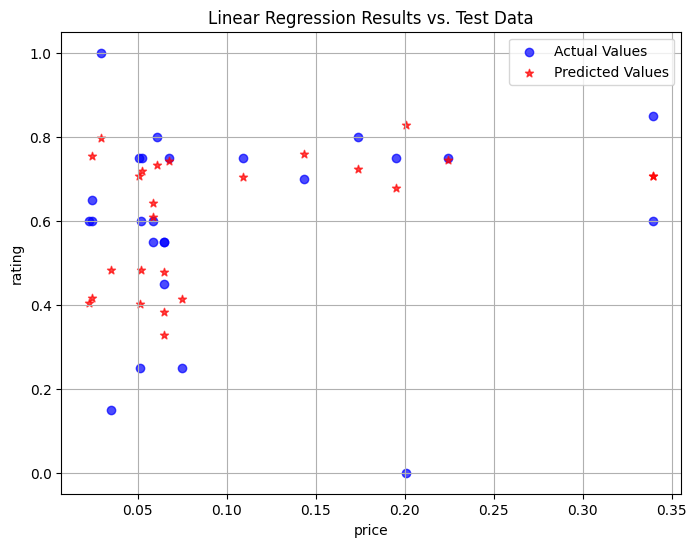

In [6]:
import matplotlib.pyplot as plt

# Select a feature from X_test for the x-axis (change 'feature_name' to your desired feature)
feature_name = 'price'  # Replace with the actual feature name
x_values = X_test['price']

# Scatter plot of the selected feature vs. predicted values and actual values
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_test, color='blue', label='Actual Values', alpha=0.7)
plt.scatter(x_values, y_pred, color='red', label='Predicted Values', alpha=0.7, marker='*')
plt.xlabel(feature_name)
plt.ylabel('rating')
plt.title('Linear Regression Results vs. Test Data')
plt.legend()
plt.grid(True)
plt.show()

## Polynomial Features

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Step 1: Create Polynomial Features
degree = 2  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 2: Create and train a Linear Regression model on the polynomial features
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

# Step 3: Make predictions on the test data
y_pred = poly_reg_model.predict(X_test_poly)

# Step 4: Evaluate the Polynomial Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Print the evaluation results
print("Mean Squared Error (MSE):", mse.round(2))
#print("Train MSE:", mean_squared_error(y_train, poly_reg_model.predict(X_train_poly)))
print("R-squared (R2) Score:", r2.round(2))

Mean Squared Error (MSE): 0.59
R-squared (R2) Score: -10.55


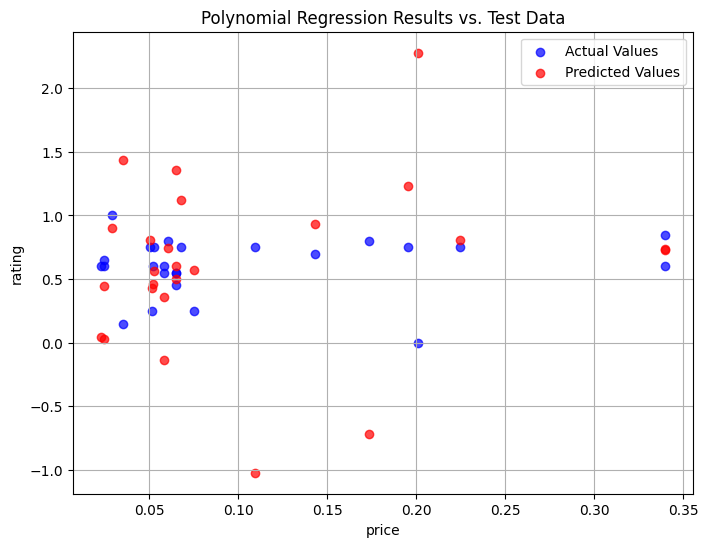

In [8]:
import matplotlib.pyplot as plt

# Select a feature from X_test for the x-axis (change 'feature_name' to your desired feature)
feature_name = 'price'  # Replace with the actual feature name
x_values = X_test['price']

# Scatter plot of the selected feature vs. predicted values and actual values
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_test, color='blue', label='Actual Values', alpha=0.7)
plt.scatter(x_values, y_pred, color='red', label='Predicted Values', alpha=0.7)
plt.xlabel(feature_name)
plt.ylabel('rating')
plt.title('Polynomial Regression Results vs. Test Data')
plt.legend()
plt.grid(True)
plt.show()

## Decision Tree Regressor

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Step 1: Create a Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters as needed

# Step 2: Train the Decision Tree Regression model on the training data
dt_regressor.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = dt_regressor.predict(X_test)

# Step 4: Evaluate the Decision Tree Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Print the evaluation results
print("Mean Squared Error (MSE):", mse.round(2))
#print("Train MSE:", mean_squared_error(y_train, dt_regressor.predict(X_train)))
print("R-squared (R2) Score:", r2.round(2))

Mean Squared Error (MSE): 0.07
R-squared (R2) Score: -0.3


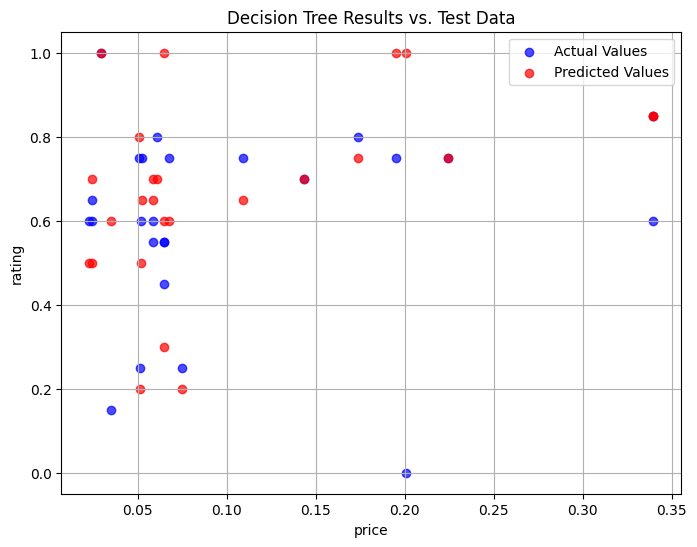

In [10]:
import matplotlib.pyplot as plt

# Select a feature from X_test for the x-axis (change 'feature_name' to your desired feature)
feature_name = 'price'  # Replace with the actual feature name
x_values = X_test['price']

# Scatter plot of the selected feature vs. predicted values and actual values
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_test, color='blue', label='Actual Values', alpha=0.7)
plt.scatter(x_values, y_pred, color='red', label='Predicted Values', alpha=0.7)
plt.xlabel(feature_name)
plt.ylabel('rating')
plt.title('Decision Tree Results vs. Test Data')
plt.legend()
plt.grid(True)
plt.show()

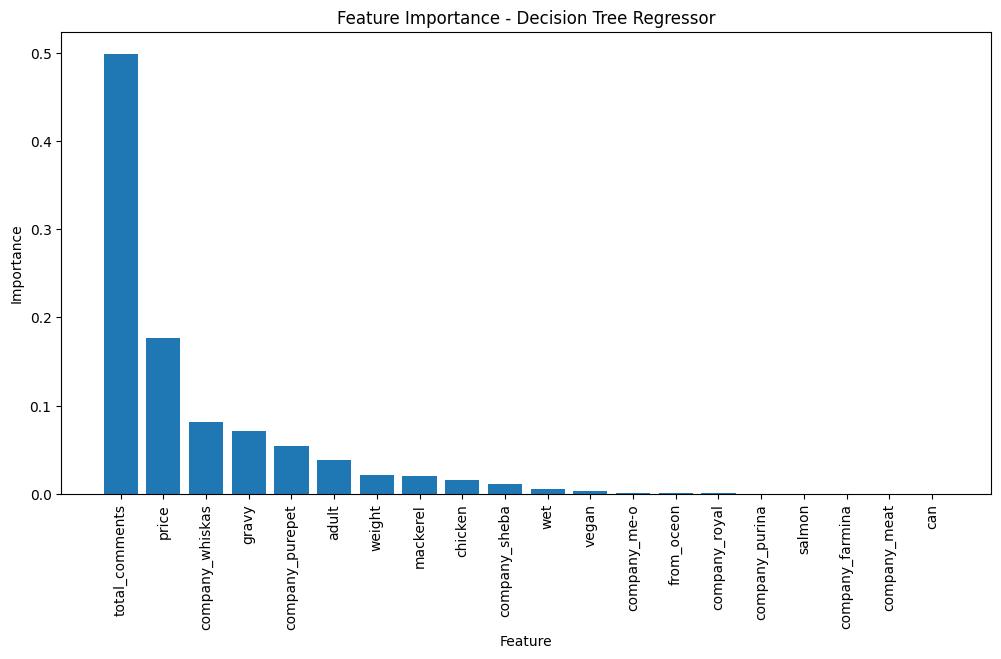

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained Decision Tree Regressor
importances = dt_regressor.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Replace with your feature DataFrame (X_train)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create labels for feature importance visualization
feature_labels = [feature_names[i] for i in indices]

# Create a bar plot of feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_labels, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Decision Tree Regressor')
plt.show()

## Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Step 1: Create a Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed

# Step 2: Train the Random Forest Regression model on the training data
rf_regressor.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Step 4: Evaluate the Random Forest Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Print the evaluation results
print("Mean Squared Error (MSE):", mse.round(2))
#print("Train MSE:", mean_squared_error(y_train, rf_regressor.predict(X_train)))
print("R-squared (R2) Score:", r2.round(2))

Mean Squared Error (MSE): 0.06
R-squared (R2) Score: -0.12


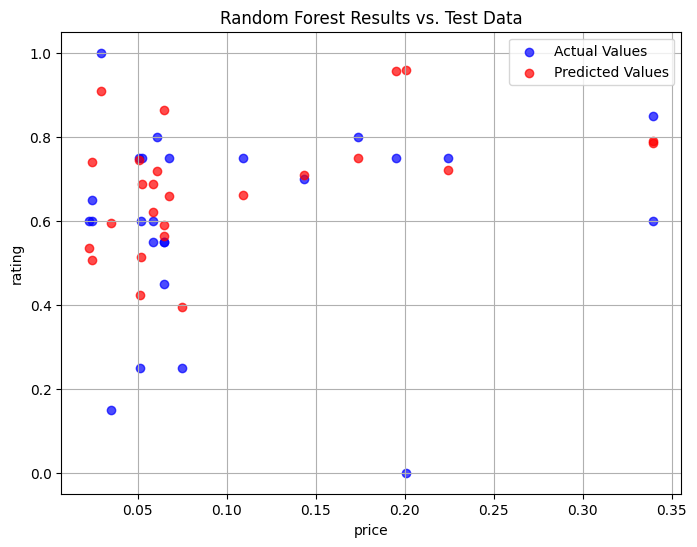

In [13]:
import matplotlib.pyplot as plt

# Select a feature from X_test for the x-axis (change 'feature_name' to your desired feature)
feature_name = 'price'  # Replace with the actual feature name
x_values = X_test['price']

# Scatter plot of the selected feature vs. predicted values and actual values
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_test, color='blue', label='Actual Values', alpha=0.7)
plt.scatter(x_values, y_pred, color='red', label='Predicted Values', alpha=0.7)
plt.xlabel(feature_name)
plt.ylabel('rating')
plt.title('Random Forest Results vs. Test Data')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
import tensorflow as tf

# Define the architecture of the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)




Epoch 1/100

3/3 [==============================] - 0s 64ms/step - loss: 0.3323 - val_loss: 0.1590
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1521 - val_loss: 0.0712
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0595 - val_loss: 0.0579
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0425 - val_loss: 0.0861
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0616 - val_loss: 0.0991
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0623 - val_loss: 0.0831
Epoch 7/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0459 - val_loss: 0.0581
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0280 - val_loss: 0.0432
Epoch 9/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0227 - val_loss: 0.0375
Epoch 10/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0227 - val_loss: 0.0360
Epoch 11/100
3/3 [=

3/3 [==============================] - 0s 11ms/step - loss: 0.0035 - val_loss: 0.0456
Epoch 76/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0035 - val_loss: 0.0458
Epoch 77/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.0461
Epoch 78/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0034 - val_loss: 0.0465
Epoch 79/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 0.0468
Epoch 80/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0034 - val_loss: 0.0467
Epoch 81/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 0.0472
Epoch 82/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0034 - val_loss: 0.0474
Epoch 83/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0476
Epoch 84/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0033 - val_loss: 0.0481
Epoch 85/100
3/3 [==========

AttributeError: 'float' object has no attribute 'round'

In [16]:
model.evaluate(X_train, y_train)

3/3 [==============================] - 0s 0s/step - loss: 0.0030


0.0029930060263723135

1/1 [==============================] - 0s 63ms/step


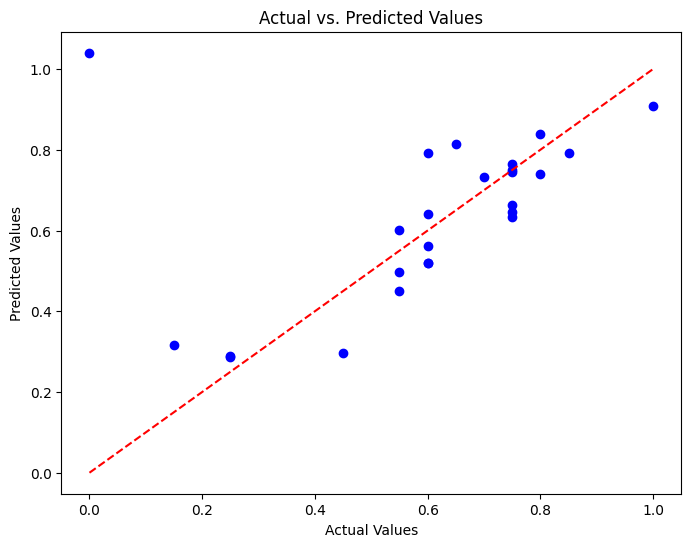

In [17]:
import matplotlib.pyplot as plt

# Predict on test data
predictions = model.predict(X_test).flatten()

# Plot predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [20]:
print("MSE", loss)

MSE 0.05129731819033623
